# <center>Breast Cancer Prediction</center>
<center>Dataset source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data</center>
<br>
<center>The data consists of features computed from breast mass images and the corresponding diagnosis:<br>Malignant (M) or Benign (B)</center>
<br>
<center>We will use Artificial Neural Network for this binary classification</center>

## 1. Import libraries and functions

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, classification_report

## 2. Read and format the dataset

In [2]:
data = pd.read_csv('data.csv')
print('#Rows:',data.shape[0],' #Columns:',data.shape[1])
data.head(3)

#Rows: 569  #Columns: 32


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
data["cancer"] = (data["diagnosis"]=='M').astype(int)

In [4]:
data.drop(['id','diagnosis'], axis=1, inplace=True)

In [5]:
data.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cancer
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


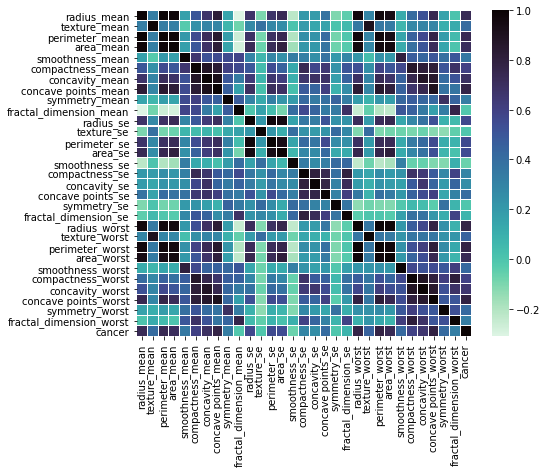

In [6]:
plt.figure(figsize=(7.5,6))
sns.heatmap(data.corr(), cmap="mako_r", linewidths=0.01);

In [7]:
print("Features with highest correlation with cancer:")
data.corr()["cancer"].sort_values(ascending=False)[1:6]

Features with highest correlation with cancer:


concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
Name: cancer, dtype: float64

In [8]:
data.describe().head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918


## 3. Train-test Split

In [9]:
X = data.drop(["cancer"], axis=1)
y = data["cancer"]

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Simple Artificial Neural Network with 2 hidden layers

In [13]:
simple_model = Sequential()
simple_model.add(Dense(30, activation='relu'))
simple_model.add(Dense(15, activation='relu'))
simple_model.add(Dense(1, activation='sigmoid'))
simple_model.compile(loss='binary_crossentropy', optimizer='adam')

In [14]:
simple_model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=0)

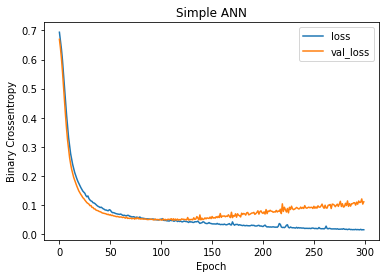

In [15]:
losses = pd.DataFrame(simple_model.history.history)
losses.plot()
plt.title('Simple ANN')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy');

## 5. ANN with early stopping

In [16]:
from keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=25)

In [18]:
estop_model = Sequential()
estop_model.add(Dense(30, activation='relu'))
estop_model.add(Dense(15, activation='relu'))
estop_model.add(Dense(1, activation='sigmoid'))
estop_model.compile(loss='binary_crossentropy', optimizer='adam')
estop_model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

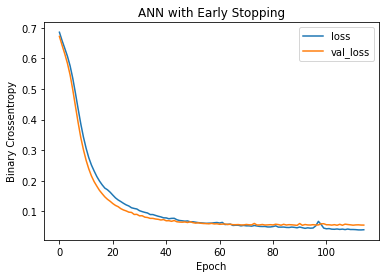

In [19]:
losses = pd.DataFrame(estop_model.history.history)
losses.plot()
plt.title('ANN with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy');

## 6. ANN with early stopping and dropout layers

In [20]:
from keras.layers import Dropout

In [21]:
final_model = Sequential()
final_model.add(Dense(30, activation='relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(15, activation='relu'))
final_model.add(Dropout(0.5))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(loss='binary_crossentropy', optimizer='adam')
final_model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

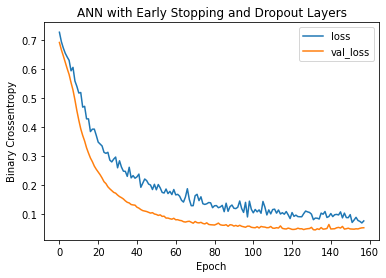

In [22]:
losses = pd.DataFrame(final_model.history.history)
losses.plot()
plt.title('ANN with Early Stopping and Dropout Layers')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy');

## Model predictions and Performance

In [23]:
train_pred = (final_model.predict(X_train) > 0.5).astype("int32")[:,0]
test_pred = (final_model.predict(X_test) > 0.5).astype("int32")[:,0]

6/6 [==============================] - 0s 797us/step


### Training set accuracy

In [24]:
print("\n1) Accuracy:", round(accuracy_score(y_train, train_pred),4))
print("\n2) F1 Score:", round(f1_score(y_train, train_pred),4))
print("\n3) Confusion Matrix:\n")
print(confusion_matrix(y_train, train_pred))


1) Accuracy: 0.9849

2) F1 Score: 0.9799

3) Confusion Matrix:

[[246   3]
 [  3 146]]


### Testing set accuracy

In [25]:
print("\n1) Accuracy:", round(accuracy_score(y_test, test_pred),4))
print("\n2) F1 Score:", round(f1_score(y_test, test_pred),4))
print("\n3) Confusion Matrix:\n")
print(confusion_matrix(y_test, test_pred))


1) Accuracy: 0.9825

2) F1 Score: 0.9764

3) Confusion Matrix:

[[106   2]
 [  1  62]]
